# **Stage 2 Task - Gene Expression and Functional Enrichment Analysis**

**Contributors** : Mahima Chakraborty (@mahima_ch), Pooja Solanki (@poojasolanki2024), Mercy Ade-Ige (@MaiStar), Nourhan Saad (@Nourhan-25), Mariam Mohamed (@Mariam000v), Osama Shukri (@Osama)

## **Introduction**

In this project, we have visualized and interpreted a glioblastoma gene expression dataset to generate a heatmap and perform downstream functional enrichment analysis in order to interpret patterns of gene expression and understand the biological significance of differentially expressed genes using R programming.
  
**Data source:** https://raw.githubusercontent.com/HackBio-Internship/public_datasets/main/Cancer2024/glioblastoma.csv  


  
In the above dataset, the **rows correspond to the genes** and the **columns represent the samples** in different conditions.


In [ ]:
#to read geneset from a csv file and store it into a variable
read_genes_data <- read.csv('https://raw.githubusercontent.com/HackBio-Internship/public_datasets/main/Cancer2024/glioblastoma.csv', row.names = 1)

#to convert genes data into a data frame
genes_df <- as.data.frame(read_genes_data)

#to visulize a few first rows of genes data frame
head(genes_df) #viewing the first few rows of the dataset

,TCGA.19.4065.02A.11R.2005.01,TCGA.19.0957.02A.11R.2005.01,TCGA.06.0152.02A.01R.2005.01,TCGA.14.1402.02A.01R.2005.01,TCGA.14.0736.02A.01R.2005.01,TCGA.06.5410.01A.01R.1849.01,TCGA.19.5960.01A.11R.1850.01,TCGA.14.0781.01B.01R.1849.01,TCGA.02.2483.01A.01R.1849.01,TCGA.06.2570.01A.01R.1849.01
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000272398,763,4526,683,1820,3113,284,491251,949,22400,9955
ENSG00000135439,2759,8384,2763,294,715,819,83504,771,1504,21358
ENSG00000130348,939,850,1250,1398,519,982,59301,1060,1553,1716
ENSG00000198719,231,1266,817,459,114,305,165404,337,5404,4069
ENSG00000169429,540,512,655,2891,1194,41877,135,7248,1911,3736
ENSG00000171608,1282,720,1694,264,342,2286,413,1181,31702,1190


# **Data Normalization**

Here, we have done **simple log2 transformation** of raw counts to stabilize the variance and to convert multiplicative relative changes to additive differences. In simple words, it is used to make the data well-behaved for further statistical analysis [1, 4].


In [ ]:
# to transform gene data in log2 excluding the first column[-1] of ENSEMBLIds, to merge the ENSEMBLIds column with log2 data and store into a new varibale
transformed_genes_df <- log2(genes_df)

#to visulize the first few line of the new data frame "transformed_genes_df"
head(transformed_genes_df)

,TCGA.19.4065.02A.11R.2005.01,TCGA.19.0957.02A.11R.2005.01,TCGA.06.0152.02A.01R.2005.01,TCGA.14.1402.02A.01R.2005.01,TCGA.14.0736.02A.01R.2005.01,TCGA.06.5410.01A.01R.1849.01,TCGA.19.5960.01A.11R.1850.01,TCGA.14.0781.01B.01R.1849.01,TCGA.02.2483.01A.01R.1849.01,TCGA.06.2570.01A.01R.1849.01
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000272398,9.575539,12.144021,9.415742,10.829723,11.604090,8.149747,18.906101,9.890264,14.45121,13.28121
ENSG00000135439,11.429930,13.033423,11.432020,8.199672,9.481799,9.677720,16.349558,9.590587,10.55459,14.38249
ENSG00000130348,9.874981,9.731319,10.287712,10.449149,9.019591,9.939579,15.855769,10.049849,10.60084,10.74483
ENSG00000198719,7.851749,10.306062,9.674192,8.842350,6.832890,8.252665,17.335635,8.396605,12.39981,11.99046
ENSG00000169429,9.076816,9.000000,9.355351,11.497353,10.221587,15.353870,7.076816,12.823367,10.90011,11.86728
ENSG00000171608,10.324181,9.491853,10.726218,8.044394,8.417853,11.158610,8.689998,10.205793,14.95229,10.21675


Insatllation of necessary packages for further analysis

In [ ]:
# to install ggplot for generating volcano plot
install.packages("ggplot2")

# to install ggrepel to prevent overlapping text labels in ggplot2 plots.
install.packages("ggrepel")

# to install gplots for genrating heatmaps
install.packages("gplots")

# to install RColorBrewer for generating colour palettes in heatmaps
install.packages("RColorBrewer")

# to load all libraries
library(gplots)
library(RColorBrewer)
library(ggrepel)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# **Data visualization with heatmaps**


A heatmap is a visual tool that represents data values within **a matrix** using a color palette.
By assigning different colors to different expression levels or genes [9], heatmaps make it easier to identify clusters of genes with similar or contrasting expression patterns [5].  
  
In our analysis we have used **heatmap.2** function of **gplots** package [6].

In [ ]:
# to convert 'new_genes_df' data frame into 'genes_matrix' matrix
# to exclude the first and last columns which are the ensembl ids and gene names
genes_matrix <- as.matrix(transformed_genes_df)


In [ ]:
# to remove Infinite values which indicate zero or negligible gene expression
genes_matrix[genes_matrix == -Inf] <- 0
genes_matrix[genes_matrix == Inf] <- 0

# Check the updated genes_matrix
head(genes_matrix)


,TCGA.19.4065.02A.11R.2005.01,TCGA.19.0957.02A.11R.2005.01,TCGA.06.0152.02A.01R.2005.01,TCGA.14.1402.02A.01R.2005.01,TCGA.14.0736.02A.01R.2005.01,TCGA.06.5410.01A.01R.1849.01,TCGA.19.5960.01A.11R.1850.01,TCGA.14.0781.01B.01R.1849.01,TCGA.02.2483.01A.01R.1849.01,TCGA.06.2570.01A.01R.1849.01
ENSG00000272398,9.575539,12.144021,9.415742,10.829723,11.604090,8.149747,18.906101,9.890264,14.45121,13.28121
ENSG00000135439,11.429930,13.033423,11.432020,8.199672,9.481799,9.677720,16.349558,9.590587,10.55459,14.38249
ENSG00000130348,9.874981,9.731319,10.287712,10.449149,9.019591,9.939579,15.855769,10.049849,10.60084,10.74483
ENSG00000198719,7.851749,10.306062,9.674192,8.842350,6.832890,8.252665,17.335635,8.396605,12.39981,11.99046
ENSG00000169429,9.076816,9.000000,9.355351,11.497353,10.221587,15.353870,7.076816,12.823367,10.90011,11.86728
ENSG00000171608,10.324181,9.491853,10.726218,8.044394,8.417853,11.158610,8.689998,10.205793,14.95229,10.21675


## **Importance of colour selection in heatmaps**

The choice of colour in a heatmap can either make data interpretation easy or difficult. The **sequential colour palette** heat map below uses **different shades of the same colour** making it very difficult to distinguish between the lighter blue colours.

In our work, the selection of colour palettes was done from the list of **RColorBrewer** palettes [10] and its usage is explained here [9].
  



### **To generate Sequential colour palette heatmap**

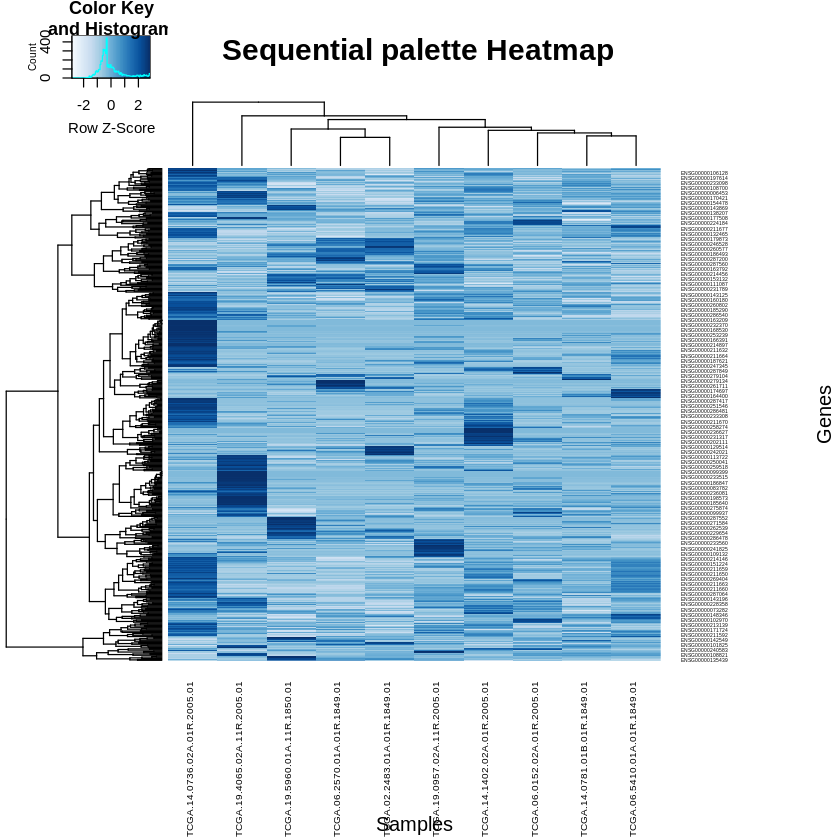

In [ ]:
# to select Sequential colour palette Blues. Here, name is a palette name and n is Number of different colors in the palette, minimum 3, maximum depending on palette
seq_pal = colorRampPalette(brewer.pal(n=9, name= "Blues" ))(100)

#to create heatmap of genes_matrix using Sequential colour palette col= seq_pal
heatmap.2(genes_matrix, col= seq_pal, scale = "row",trace = "none", main = " Sequential palette Heatmap", lhei = c(2.5,10),lwid = c(2.5,10), margins = c(9,9), cexRow = 0.3, cexCol = 0.6, xlab = "Samples", ylab = "Genes")


### **To generate Divergent colour palette heatmap**

The **diverging colour palette** uses either two different colour hues or a palette with warm and cold colour hues, which clearly indicates the level of expression of the different genes without creating any confusion.

Therefore, divergent palettes are preferred for gene expression analysis using heatmaps. heatmap interpretation is explained in details here [11].

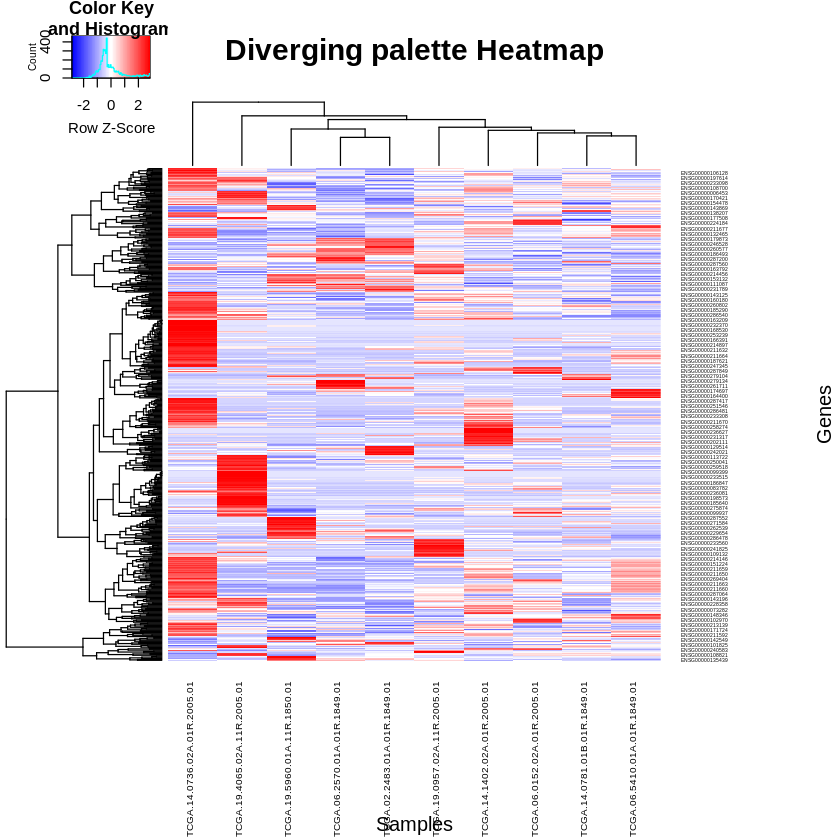

In [ ]:
# to create diverging color heatmap of genes_matrix using col = bluered(100)
heatmap.2(genes_matrix, col= bluered(100), trace = "none", scale = "row", main = "Diverging palette Heatmap", lhei = c(2.5,10),lwid = c(2.5,10), margins = c(9,9), cexRow = 0.3, cexCol = 0.6, xlab = "Samples", ylab = "Genes")

## **Variants of Heatmaps**

In a clustered heatmap, clusters are generated based on the similar gene expression patterns of genes and samples [11, 12].

### **Generate heatmap with only gene clusters (rows)**
The parameter `dendrogram = "row"` clusters a heatmap by rows (genes) and `Colv = FALSE` prevents clustering of the columns since default value of Colv remains `TRUE`.  

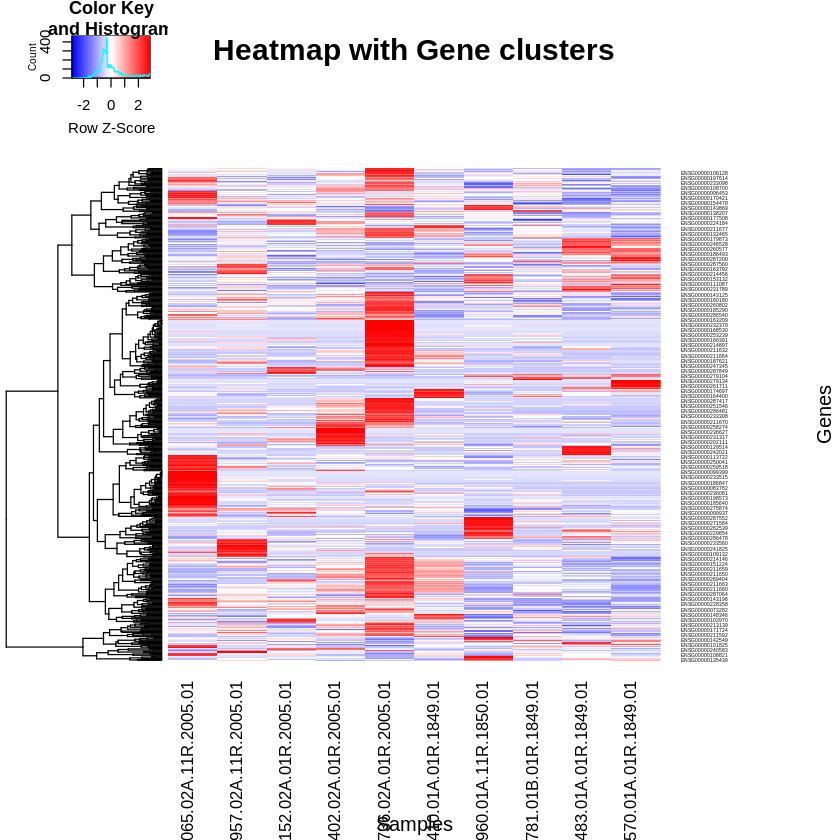

In [ ]:
# to generate a heatmap with Gene clusters (row) using dendrogram = "row" and Colv = FALSE
heatmap.2(genes_matrix,
          Rowv = T,
          Colv = F,
          dendrogram = "row",
          scale = "row",
          trace ="none",
          col= bluered(100),
          main = "Heatmap with Gene clusters",
          lhei = c(2.5,10),
          lwid = c(2.5,10),
          margins = c(9,9),
          cexRow = 0.3,
          cexCol = 1,
          xlab = "Samples",
          ylab = "Genes")

### **Generate heatmap with only sample (columns) clusters**
The parameter `dendrogram = "column"` clusters a heatmap by samples (columns) and `Rowv = FALSE` prevents clustering of the rows since default value of Rowv remains `TRUE`.
Here, we can clearly see the **two sample groups** represented by clusters.

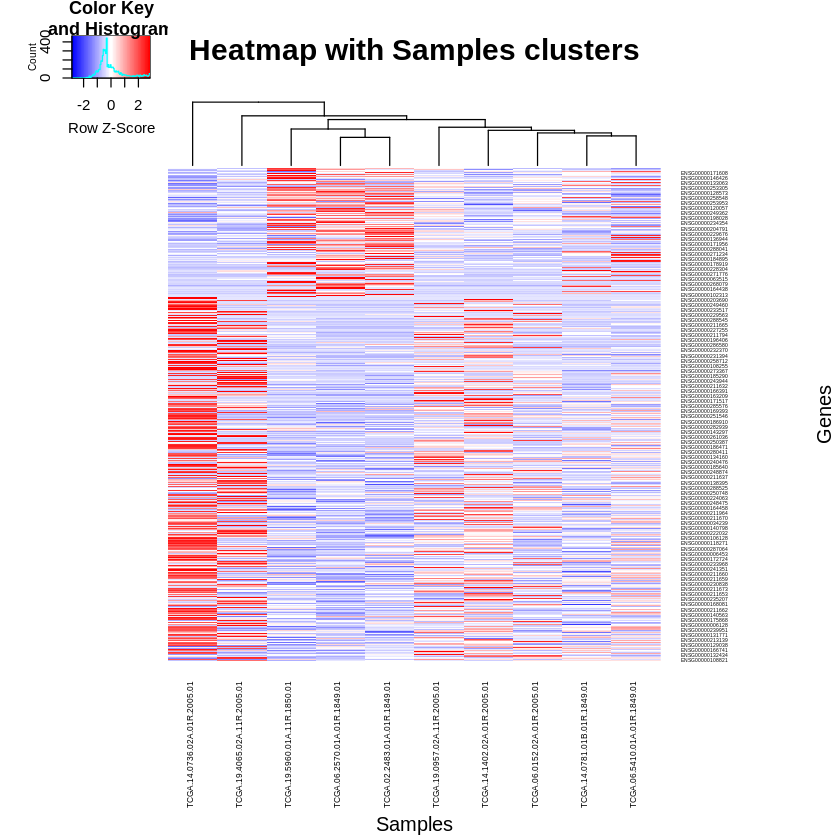

In [ ]:
# to generate a heatmap with Sample clusters (Column clusters) using dendrogram = "column" and Colv= TRUE
Heatmap_object <- heatmap.2(genes_matrix,
          Rowv = FALSE,
          Colv= TRUE,
          dendrogram = "col",
          scale = "row",
          trace ="none",
          col= bluered(100),
          main = "Heatmap with Samples clusters",
          lhei = c(2.5,10),
          lwid = c(2.5,10),
          margins = c(9,9),
          cexRow = 0.3,
          cexCol = 0.5,
          xlab = "Samples",
          ylab = "Genes")

# scale="row" because the changes gene expression needs to be measured the samples and not the other way round



### **Generate a heatmap with both Genes (rows) and Samples (columns) clusters**

The parameter `dendrogram = "both"` clusters a heatmap by both genes (rows) and samples (columns). Here, we have used the default values `TRUE` for both Rowv and Colv parameters.

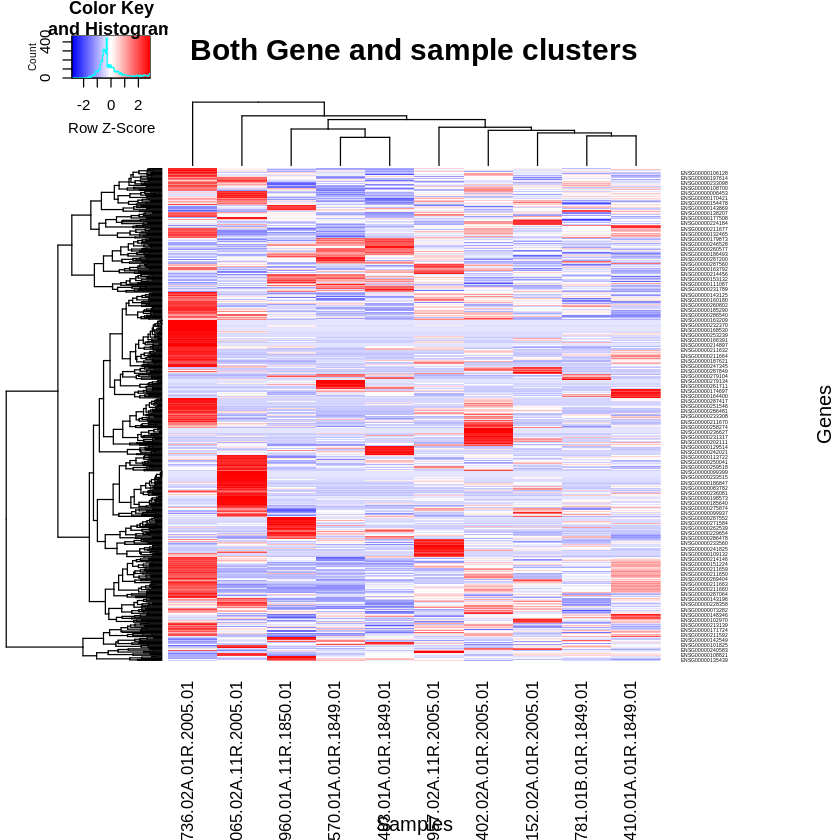

In [ ]:
#to generate gene and sample clusters
heatmap.2(genes_matrix,
          Rowv = T,
          Colv = T,
          dendrogram = "both",
          scale = "row",
          trace ="none",
          col= bluered(100),
          main = "Both Gene and sample clusters",
          lhei = c(2.5,10),
          lwid = c(2.5,10),
          margins = c(9,9),
          cexRow = 0.3,
          cexCol = 1,
          xlab = "Samples",
          ylab = "Genes")

## **Finding significantly upregulated and downregulated genes**  

Now that we have found two sample groups, it is crucial that we determine which genes are most **upregulated** or **downregulated** and which ones are **unaffected** across different samples [13].

In order to do so we calculated two key metrics:

*   **Log 2 Fold change (Log2FC)** - compares gene expression levels between two conditions (here they are primary and recurrent tumor samples).  

*   **p-value** - measures the statistical significance of the changes in gene expression levels.
  

**Identify two samples clusters group generated by the heatmap**

In [ ]:
#to extract column colDendrogram from heatmap_object object
heatmap_object$colDendrogram

### heatmap_object$colInd: extracts the column index from the heatmap_object. ###
#This index represents the order of columns after they have been clustered by the heatmap.2 function.
#colnames(genes_matrix)[...] uses the column index to extract the corresponding column names
#from the genes_matrix.
clustered_cols <- colnames(genes_matrix)[heatmap_object$colInd]

# to extract all the raws and group 1 sample columns (1 to 5) from clustered_cols
group_1 <- genes_matrix[,clustered_cols[1:5]]

# to extract all the raws and group 2 sample columns (6 to 10) from clustered_cols
group_2 <- genes_matrix[,clustered_cols[6:10]]


'dendrogram' with 2 branches and 10 members total, at height 116.3058 

**Calculate T-test to obtain p-values for each genes of all the samples**

In [ ]:
### to create a function to calculate t-test for each gene in order to find p-value for each gene

# function(df, grp1, grp2) defines functions which inputs are dataframe (df), group1(grp1) and group2(grp2)
ttest_function <- function(df, grp1, grp2) {

  # to assign grp1 and grp2 values in the varibale x and y respectively
  x = df[grp1]
  y = df[grp2]

  # to convert x's and y's values into numeric
  x = as.numeric(x)
  y = as.numeric(y)

  # to perform T.test between two groups x and y and stores into ttest_results variable
  ttest_results = t.test(x, y)

  # to extract p.value column from
  ttest_results$p.value
}

# to apply ttest_function on genes_matrix to perform T-test between each rows of group1 and group2
## here 1 represents row as we want values for each gene (row)
rawpvalue = apply(genes_matrix, 1, ttest_function, grp1 = group_1, grp2 = group_2)

**Calculate Fold change to compare gene expression levels between two conditions**


In [ ]:
### log2 Fold Change calculation

# to calculate the mean of each genes (row-wise) in group_1.
## Here in apply(group_1, 1, mean) function, 1 represents row as we want to calculate mean row-wise.
group_1_mean = apply(group_1, 1, mean)

# to calcuate the mean of each genes (row-wise) in group_2
group_2_mean = apply(group_2, 1, mean)

# to confirm that groups class is a vector of numbers
class(group_1_mean)
class(group_2_mean)

# to calculate foldchange substract group2 mean from group1 as our data is already transformed into log2
foldchange <- group_1_mean - group_2_mean

[1] "numeric"

[1] "numeric"

#### **Combine Fold change and Raw p-value in one data frame**

In [ ]:
# to combine fold chnage and raw pvalue objects which has 1st columns as Gene Names
results_FC_pvalue = cbind(foldchange, rawpvalue)

# to convert fold change and raw pvalue into dataframe
results_FC_pvalue = as.data.frame(results_FC_pval)

# to extract rownames (Gene Names) of results_FC_pvalue data frame and add new column probename to the same data frame
results_FC_pvalue$probename <- rownames(results_FC_pvalue)

# to transform raw p-value into -log10 values
results_FC_pvalue <- transform(results_FC_pvalue, adjpvalue = -1*log10(rawpvalue))

In [ ]:
head(results_FC_pvalue)

,foldchange,rawpvalue,adjpvalue,probename
,<dbl>,<dbl>,<dbl>,<chr>
ENSG00000272398,3.477730,0.0020383066,2.6907305,ENSG00000272398
ENSG00000135439,2.052989,0.2343985363,0.6300451,ENSG00000135439
ENSG00000130348,1.127682,0.0004325152,3.3639987,ENSG00000130348
ENSG00000198719,2.187734,0.0012121918,2.9164287,ENSG00000198719
ENSG00000169429,-1.777467,0.1981070298,0.7031001,ENSG00000169429
ENSG00000171608,0.594839,0.0102178136,1.9906420,ENSG00000171608


### **Subset genes that are significantly upregulated or downregulated**

Here, we have set **p-value** cutoff as **0.05** and **Log2 Fold Change** cutoff as **>1** for upregulated genes and **<-1** for downregulated genes.

With this parameters, a total **84 upregulated** and **56 downregulated** genes were found.

In [ ]:
# to classify upregulated and downregulated genes based on 0.05 cutoff and add values in the new column expression
results_FC_pvalue$expression <- ifelse(results_FC_pvalue$rawpvalue < 0.05 & results_FC_pvalue$foldchange > 1, "Upregulated",
                          ifelse(results_FC_pvalue$rawpvalue < 0.05 & results_FC_pvalue$foldchange < -1, "Downregulated", "Not significant"))

head(results_FC_pvalue)


,foldchange,rawpvalue,adjpvalue,probename,expression
,<dbl>,<dbl>,<dbl>,<chr>,<chr>
ENSG00000272398,3.477730,0.0020383066,2.6907305,ENSG00000272398,Upregulated
ENSG00000135439,2.052989,0.2343985363,0.6300451,ENSG00000135439,Not significant
ENSG00000130348,1.127682,0.0004325152,3.3639987,ENSG00000130348,Upregulated
ENSG00000198719,2.187734,0.0012121918,2.9164287,ENSG00000198719,Upregulated
ENSG00000169429,-1.777467,0.1981070298,0.7031001,ENSG00000169429,Not significant
ENSG00000171608,0.594839,0.0102178136,1.9906420,ENSG00000171608,Not significant


In [ ]:
# to remove Not significant genes from the data frame and only significantly Upregulated and Downregulated genes
significant_genes <- results_FC_pvalue[results_FC_pvalue$expression != "Not significant",]

# To download significant_genes as a CSV file into your computer
write.csv(significant_genes, file = "significant_genes.csv")

# to extract only upregulated genes from the significant genes data frame
upregulated_genes <- significant_genes[significant_genes$expression == "Upregulated",]

# to extract only downregulated genes from the significant genes data frame
downregulated_genes <- significant_genes[significant_genes$expression == "Downregulated",]

# Check the number of upregulated and downregulated genes

print(paste("Number of UpRegulated genes:", length(upregulated_genes$expression)))
print(paste("Number of DownRegulated genes:", length(downregulated_genes$expression)))

[1] "Number of UpRegulated genes: 84"
[1] "Number of DownRegulated genes: 56"


In [ ]:
# to export upregulated genes into a csv file
write.csv(upregulated_genes, file = "upregulated_genes.csv", row.names = FALSE)

# to export downregulated genes into a csv file
write.csv(downregulated_genes, file = "downregulated_genes.csv", row.names = FALSE)

### **Visualize Upregulated and Downregulated genes using Volcano plot of ggplot2 package**
  
A volcano plot visually compares two treatment conditions by displaying the **adjusted P-value** against the **log2 fold-change** for each gene.  **The wider the dispersion of data points, the greater the difference in gene expression between the treatments [13, 14].**

Saving 6.67 x 6.67 in image


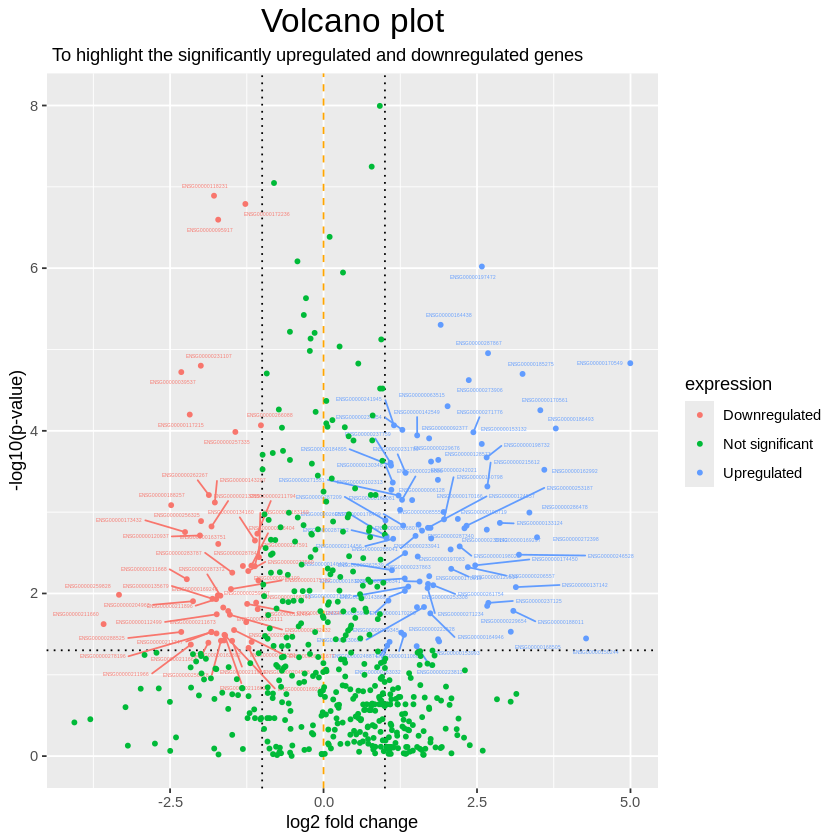

In [ ]:
### to draw volcano plot from results_FC_pvalue data frame ###

#ggplot is a function to draw plot. In ggplot2, aes stands for aesthetic mappings. On the x-axis, fold change values are mapped while on the y-axis, adjusted p-values are mapped.
volcano = ggplot(data = results_FC_pvalue, aes(x = foldchange, y = adjpvalue, col = expression, label = probename)) +
  geom_vline(xintercept = c(-1,1), col = "black", linetype = "dotted") +                                                                #geom_vline - to add vertical line in the x-axis with balck colour and dotted pattern
  geom_hline(yintercept = c(-log10(0.05)), col = "black", linetype = "dotted") +                                                        #geom_hline - to add horizontal line in the y-axis with balck colour and dotted pattern
  geom_vline(xintercept = 0, col = "orange", linetype = "dashed") +                                                                     # to add vertical line the x-axis at x=0 position
  labs(title = "Volcano plot", subtitle = " To highlight the significantly upregulated and downregulated genes") +                      # to add plot title and subtitle
  theme(plot.title = element_text(size = 20,  hjust = 0.5)) +                                                                           #to set title size to 20 and keep title in the center
  xlab("log2 fold change") +                                                                                                            #to add x-axis label
  ylab("-log10(p-value)") +                                                                                                             #to add y-axis label
  geom_text_repel(data = subset(results_FC_pvalue, expression %in% c("Upregulated", "Downregulated")), max.overlaps = Inf, size = 1) +  # to filters the data to only include points where the expression value is either "Upregulated" or "Downregulated".
  geom_point(size = 1)                                                                                                                  # to set font size of the label
volcano

# to save the volcano plot as a PNG file named "volcano_Upregulated_Downregulated.png"
ggsave("volcano_Upregulated_Downregulated.png", plot = volcano, device = "png")



## **Functional Pathway Enrichment Analysis using ShinyGO web-based tool**

The Pathway Enrichment Analysis was done seperately for **84 upregulated** and **56 downregulated** genes. The FDR cutoff was set to **0.05** and **Go Biologicals Process** database was selected. At last, the pathways were sorted by **Enrichment FDR** values as shown in the figure below.  
The gene names are first obtained manually from https://www.ensembl.org/biomart/martview/81ffeb51ec057f2d556b894758afa52b
  
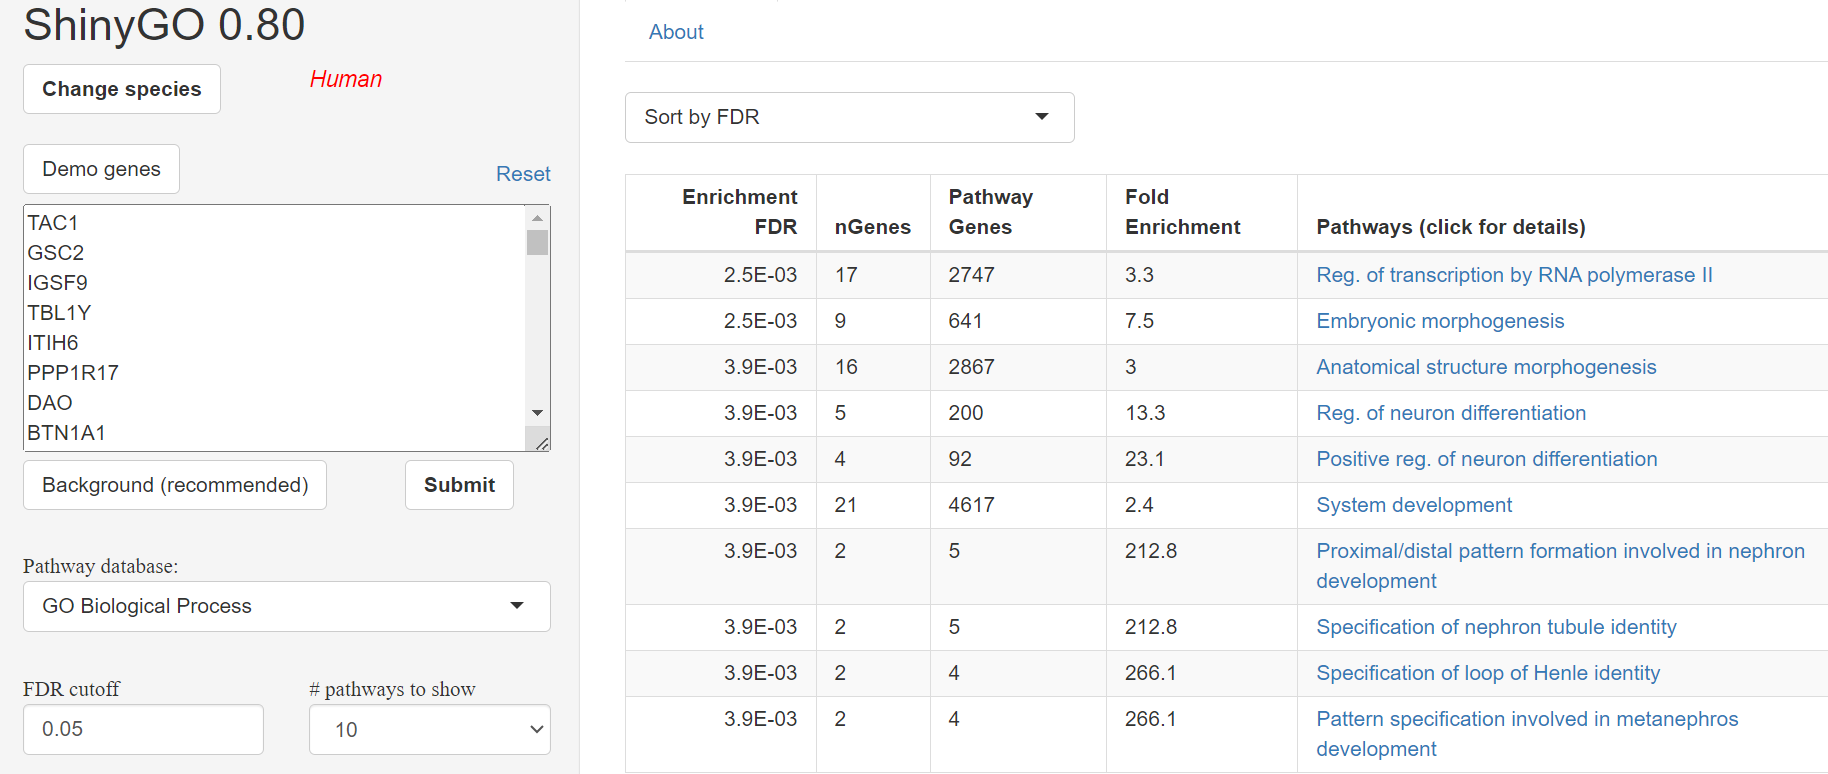

The top 5 pathways detected from **ShinyGo** for **upregulated genes** with the **number of genes** found in each pathways from our dataset.

*   Reg. of transcription by RNA polymerase II 	- 17
*   Embryonic morphogenesis -	9
*   Anatomical structure morphogenesis -	16
*   Reg. of neuron differentiation -	5
*   Positive reg. of neuron differentiation -	4



### **Lollipop plots generation**

In [ ]:
#to read enrichment data for Upregulated genes from a csv file
enrichment_upregGenes <- read.csv("https://raw.githubusercontent.com/PoojaSolanki2017/HackBio_Cancer-Internship/main/Stage2/enrichment_upregulated.csv", sep =",")

str(enrichment_upregGenes)

'data.frame':	10 obs. of  7 variables:
 $ Enrichment.FDR : num  0.00247 0.00247 0.00392 0.00392 0.00392 ...
 $ nGenes         : int  17 9 16 5 4 21 2 2 2 2
 $ Pathway.Genes  : int  2747 641 2867 200 92 4617 5 5 4 4
 $ Fold.Enrichment: num  3.29 7.47 2.97 13.3 23.14 ...
 $ Pathway        : chr  "GO:0006357 reg. of transcription by RNA polymerase II " "GO:0048598 embryonic morphogenesis " "GO:0009653 anatomical structure morphogenesis " "GO:0045664 reg. of neuron differentiation " ...
 $ URL            : chr  " http://amigo.geneontology.org/amigo/term/GO:0006357" " http://amigo.geneontology.org/amigo/term/GO:0048598" " http://amigo.geneontology.org/amigo/term/GO:0009653" " http://amigo.geneontology.org/amigo/term/GO:0045664" ...
 $ Genes          : chr  " GSC2  TBL1Y  FOXP2  FOXA1  NEUROD1  TLX3  GBX2  NR0B1  HOXD4  IRX1  IRX2  BEND3  FOXE1  SRY  ZNF560  ZNF695  ZNF492" " HOXD4  GDF7  NEUROD1  GBX2  NR0B1  IRX1  IRX2  FOXE1  TRIM71" " IGSF9  FOXA1  TIAM2  SEMA3D  HOXD4  FOXE1  SRY  GDF7 

In [ ]:
# to extract the top 5 pathways based on their FDR values for Upregulated genes
top_5_pathways_upregGenes <- enrichment_upregGenes[1:5, ]

#to remove URL and Genes columns from top_5_pathways_upregGenes
top_5_pathways_upregGenes <- top_5_pathways_upregGenes[, !names(top_5_pathways_upregGenes) %in% c("URL", "Genes")]

# to Remove GO numbers from pathway column in top_5_pathways_upregGenes
top_5_pathways_upregGenes$Pathway <- sub("GO:[0-9]+ ", "", top_5_pathways_upregGenes$Pathway)

# to use transform to convert Enrichment.FDR into -log10 and add that a new column into dataframe     top_5_pathways_upregGenes
top_5_pathways_upregGenes <- transform(top_5_pathways_upregGenes, minus_log10_FDR = -log10(`Enrichment.FDR`))


top_5_pathways_upregGenes

,Enrichment.FDR,nGenes,Pathway.Genes,Fold.Enrichment,Pathway,minus_log10_FDR
,<dbl>,<int>,<int>,<dbl>,<chr>,<dbl>
1,0.002466545,17,2747,3.293038,reg. of transcription by RNA polymerase II,2.607911
2,0.002466545,9,641,7.471211,embryonic morphogenesis,2.607911
3,0.003916779,16,2867,2.969606,anatomical structure morphogenesis,2.407071
4,0.003916779,5,200,13.302907,reg. of neuron differentiation,2.407071
5,0.003916779,4,92,23.135490,positive reg. of neuron differentiation,2.407071


Saving 6.67 x 6.67 in image


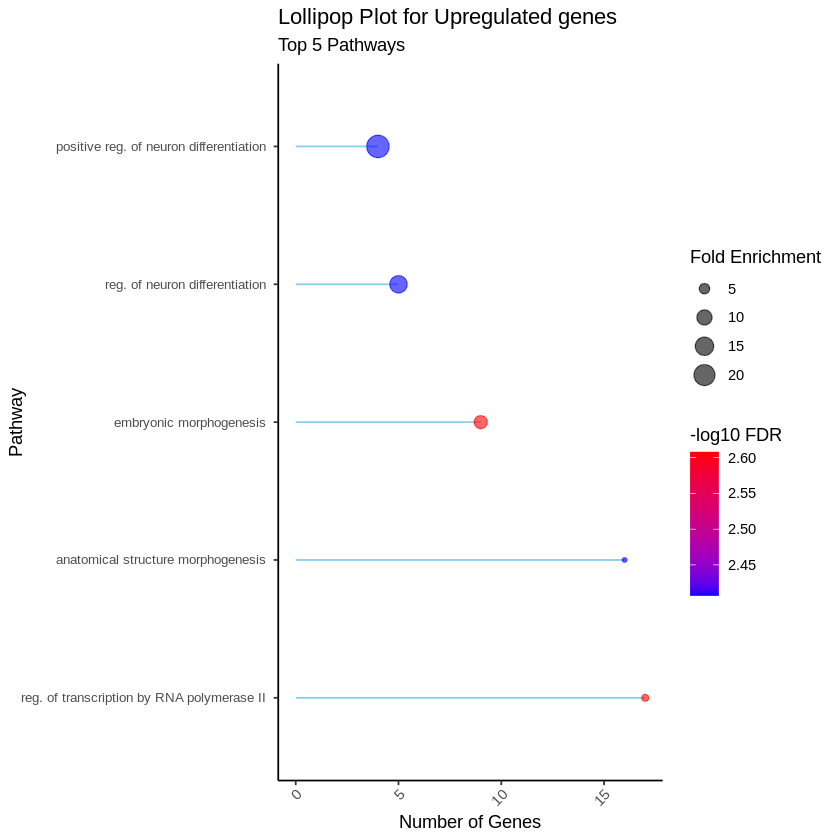

In [ ]:
lolliplot_upregulated = ggplot(top_5_pathways_upregGenes, aes(x = reorder(Pathway, -nGenes), y = nGenes)) +
  geom_segment(aes(x = Pathway, xend = Pathway, y = 0, yend = nGenes), color = "skyblue") +
  geom_point(aes(size = Fold.Enrichment, color = minus_log10_FDR), alpha = 0.6) +
  scale_color_gradient(low = "blue", high = "red") +       # Color scale for minus_log10_FDR
  labs(title = "Lollipop Plot for Upregulated genes",
        subtitle = "Top 5 Pathways",
       x = "Pathway",
       y = "Number of Genes",
       size = "Fold Enrichment",                           # Change label here
       color = "-log10 FDR") +                             # Change label for color legend
  theme_classic() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1), # Rotate x-axis labels
  axis.text.y = element_text(size = 8)) +                  # Increase size of pathway names
  coord_flip()

lolliplot_upregulated

# Save the lollipop plot as a PNG file
ggsave("lolliplot_upregulated.png", plot = lolliplot_upregulated, device = "png")


Our analysis of the upregulated genes in the glioblastoma identified the below enriched pathways as the top five in terms of biological processes, in which they are significantly involved in the pathogenesis of cancer, especially glioblastoma.

**1) Transcription by RNA polymerase II (GO:0006357)**

This process is a part of crucial pathways involved in regulation of gene expression, hence the regulation of cell proliferation and survival. Transcription dysregulation can promote oncogenes leading to tumorigenesis and survival of cancer cells; therefore, it is a hallmark in glioblastoma [21].

**2) Embryonic morphogenesis (GO:0048598)**

The enriched involvement of the analysed genes in embryonic morphogenesis, further highlights the involvement of the development pathways in glioblastoma. The development pathways are crucial for building and maintaining tissue structure and shape, therefore their dysregulation promotes malignancy [19].

**3) Anatomical structure morphogenesis (GO:0009653)**

The involvement of the analysed genes in this process, suggests that glioblastoma changes its morphology when grows and invade the brain, by utilizing the morphogenetics to enhance its structure and adaptability. This promotes its resistance to anticancer therapies [22,23].

**4) Regulation of Neuron Differentiation (GO:0045664)**

This process involves modulating the frequency or extent of neuron differentiation, where neural stem or progenitor cells become specialized neurons. GBM can exhibit aberrant neurogenesis, with tumor cells co-opting neuron differentiation pathways to enhance growth and survival. Upregulation of these genes might indicate that GBM leverages these mechanisms for increased aggressiveness and treatment resistance [20].

**5) Proximal/distal pattern formation involved in nephron development (GO:0072047)**

Proximal-distal patterning is crucial for nephron development and can be observed from the earliest stages of nephron formation. In the renal vesicle, gene expression is already organized along the future proximal-distal axis, highlighting the importance of this regulatory mechanism. Research indicates that intrinsic signals, particularly components of the Notch pathway, are central to regulating this patterning. However, additional cell signaling mechanisms may also influence this developmental process, underscoring the complexity of nephron morphogenesis [25].
  
   
In conclusion, further investigation about these significantly upregulated genes would enhance the understanding of glioblastoma pathogenicity, which can lead to new biomarkers discovery and development of new therapeutic strategies.


# **References**



1.   Johnson, K.A., Krishnan, A. Robust normalization and transformation techniques for constructing gene coexpression networks from RNA-seq data. Genome Biol 23, 1 (2022). https://doi.org/10.1186/s13059-021-02568-9

2.   https://bioinformatics-core-shared-training.github.io/RNAseq_November_2020_remote/html/02_Preprocessing_Data.html#raw-counts

3. Booeshaghi, A. S., & Pachter, L. (2021). Normalization of single-cell RNA-seq counts by log(x + 1) or log(1 + x). Bioinformatics, 37(15), 2223-2224. https://doi.org/10.1093/bioinformatics/btab085

4. Bioinformagician. (2022, April 13). 3 ways to convert Ensembl IDs to gene symbols | Bioinformatics 101 [Video]. YouTube. https://www.youtube.com/watch?v=cWe359VnfaY

5. Zhao, S., Guo, Y., Sheng, Q., & Shyr, Y. (2014). Advanced Heat Map and Clustering Analysis Using Heatmap3. BioMed Research International, 2014. https://doi.org/10.1155/2014/986048

6. Comprehensive R Archive Network (CRAN). (2024, February 2). Various R Programming Tools for Plotting Data [R package gplots version 3.1.3.1]. https://cran.r-project.org/web/packages/gplots/index.html

7. Bonnin, S. (2020b, March 9). 18.1 heatmap.2 function from gplots package | Introduction to R. https://biocorecrg.github.io/CRG_RIntroduction/heatmap-2-function-from-gplots-package

8. Differential gene expression. (n.d.). https://biocorecrg.github.io/CRG_Bioinformatics_for_Biologists/differential_gene_expression.html#:~:text=The%20Fold%20change%20indicates%20whether,Type%20compared%20to%20Knock%20Out

9. Peng, R. D. (2020, May 1). 10 Plotting and Color in R | Exploratory Data Analysis with R. https://bookdown.org/rdpeng/exdata/plotting-and-color-in-r.html

10. Holtz, Y. (n.d.). R Color Brewer’s palettes. https://r-graph-gallery.com/38-rcolorbrewers-palettes.html

11. Biostatsquid. (2023, April 12). How to interpret a heatmap for differential gene expression analysis - simply explained! [Video]. YouTube. https://www.youtube.com/watch?v=Bfx9R5mL2NY

12. Biostatsquid, & Biostatsquid. (2024, August 25). Heatmaps for gene expression analysis – simple explanation with an example - biostatsquid.com. biostatsquid.com - Easy computational Biology and biostatistics. https://biostatsquid.com/heatmaps-simply-explained/

13. McDermaid, A., Monier, B., Zhao, J., Liu, B., & Ma, Q. (2019). Interpretation of differential gene expression results of RNA-seq data: Review and integration. Briefings in Bioinformatics, 20(6), 2044-2054. https://doi.org/10.1093/bib/bby067

14. Data Analysis. (n.d.). https://www.bioconductor.org/help/course-materials/2015/Uruguay2015/day5-data_analysis.html

15. Biostatsquid. (2022, November 11). Volcano plots with ggplot2 for differential gene expression| Beginner-friendly R [Video]. YouTube. https://www.youtube.com/watch?v=sIRnaKo1aKE

16. Shi, Y., Wang, M., Shi, W., Lee, J. H., Kang, H., & Jiang, H. (2019). Accurate and efficient estimation of small P-values with the cross-entropy method: applications in genomic data analysis. Bioinformatics (Oxford, England), 35(14), 2441–2448. https://doi.org/10.1093/bioinformatics/bty1005

18. H. Wickham. ggplot2: Elegant Graphics for Data Analysis. Springer-Verlag New York, 2016.

19. Slowikowski, K. (2024, September 7). Getting started with ggrepel. https://cran.r-project.org/web/packages/ggrepel/vignettes/ggrepel.html

20.	Curry, R. N., & Glasgow, S. M. (2021). The Role of Neurodevelopmental Pathways in Brain Tumors. Frontiers in Cell and Developmental Biology, 9, 659055. https://doi.org/10.3389/fcell.2021.659055
21.	Germano, I., Swiss, V., & Casaccia, P. (2010).
Primary brain tumors, neural stem cell, and brain tumor cancer cells Neuropharmacology, 58(6), 903–910. https://doi.org/10.1016/j.neuropharm.2009.12.019

22.	Li, X.-L., Xie, Y., Chen, Y.-L., Zhang, Z.-M., Tao, Y.-F., Li, G., Wu, D., Wang, H.-R., Zhuo, R., Pan, J.-J., Yu, J.-J., Jia, S.-Q., Zhang, Z., Feng, C.-X., Wang, J.-W., Fang, F., Qian, G.-H., Lu, J., Hu, S.-Y., … Pan, J. (2023).
The RNA polymerase II subunit B (RPB2) functions as a growth regulator in human glioblastoma. Biochemical and Biophysical Research Communications, 674, 170–182. https://doi.org/https://doi.org/10.1016/j.bbrc.2023.06.088

23.	Majc, B., Sever, T., Zarić, M., Breznik, B., Turk, B., & Lah, T. T. (2020).
Epithelial-to-mesenchymal transition as the driver of changing carcinoma and glioblastoma microenvironment. Biochimica et Biophysica Acta (BBA) - Molecular Cell Research, 1867(10), 118782. https://doi.org/https://doi.org/10.1016/j.bbamcr.2020.118782

24.	Wu, J., Jiang, J., Chen, B., Wang, K., Tang, Y., & Liang, X. (2021).
Plasticity of cancer cell invasion: Patterns and mechanisms. Translational Oncology, 14(1), 100899. https://doi.org/https://doi.org/10.1016/j.tranon.2020.100899


25.	Thomas Carroll, Callie S. Kwartler, Chapter 12 - Developmental Roles of the Stroma, Editor(s): Melissa H. Little, Kidney Development, Disease, Repair and Regeneration, Academic Press, 2016, Pages 133-145, ISBN 9780128001028, https://doi.org/10.1016/B978-0-12-800102-8.00012-6. (https://www.sciencedirect.com/science/article/pii/B9780128001028000126)



